# Confidence intervals for bernoulli distributions

Based on a particular paper... on the onenote...

In [1]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline
from statsmodels.stats.proportion import proportion_confint as confidenceInterval

In [2]:
import plotly.offline as plt
import plotly.graph_objs as go

In [3]:
plt.init_notebook_mode(connected=True)

In [27]:
def jeffreyInterval(m,num):
    return confidenceInterval(round(m*num), num, method='jeffreys')

In [37]:
def getErrBars(means, num, method):
    bounds = [[],[]]
    for m in means:
        rn = round(m*num)
        mi, ma = confidenceInterval(round(m*num), num, method=method)
        print(rn,mi,ma)
        bounds[0].append(m-mi)
        bounds[1].append(ma-m)
    return bounds

In [38]:
def getErrBars_(m, nums, method):
    bounds = [[],[]]
    for num in nums:
        mi, ma = confidenceInterval(round(m*num), num, method=method)
        bounds[0].append(m-mi)
        bounds[1].append(ma-m)
    return bounds

In [39]:
td = np.array([  0.        ,   0.66666667,   0.        ,  21.33333333, 59.33333333,  66.        ,  64.66666667,  66.        ,
        78.        ,  75.33333333,  85.33333333,  88.66666667,
        88.        ,  86.66666667,  80.66666667,  84.66666667,
        78.66666667,  70.        ,  50.66666667,  32.        ,
        48.        ,  50.66666667])/100

In [40]:
getErrBars(td, 150, 'jeffreys');

0.0 3.2681069968e-06 0.0165793851144
1.0 0.000720260706173 0.0307314612033
0.0 3.2681069968e-06 0.0165793851144
32.0 0.153630631974 0.28397361805
89.0 0.513560092338 0.669543476263
99.0 0.581708109253 0.732184320172
97.0 0.567953367547 0.719781219418
99.0 0.581708109253 0.732184320172
117.0 0.708766592461 0.840549748197
113.0 0.679964896215 0.817034253117
128.0 0.790192663819 0.903001343375
133.0 0.828650761422 0.929947901744
132.0 0.820864968281 0.924652240025
130.0 0.80544071626 0.913914446031
121.0 0.737961197474 0.863673123818
127.0 0.782628399008 0.897485292282
118.0 0.71602638195 0.846369368026
105.0 0.623375014584 0.768991253489
76.0 0.427171767492 0.585907047361
48.0 0.249334817219 0.397535899684
72.0 0.401070116738 0.559693437336
76.0 0.427171767492 0.585907047361


### diff values of mean

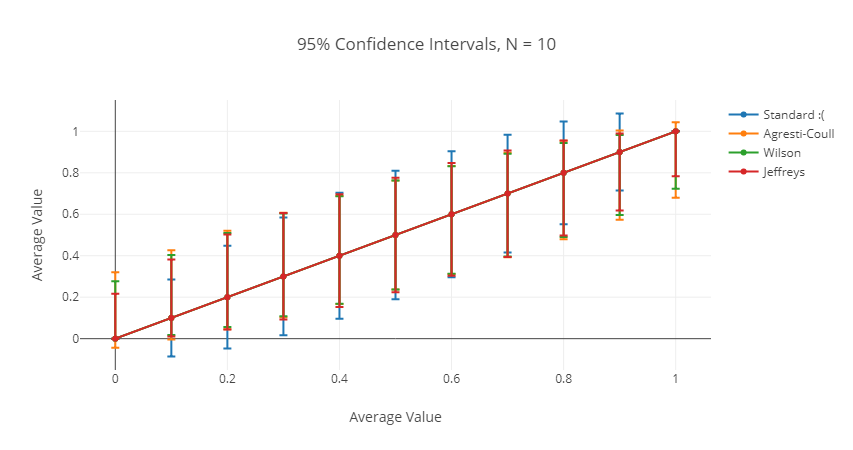

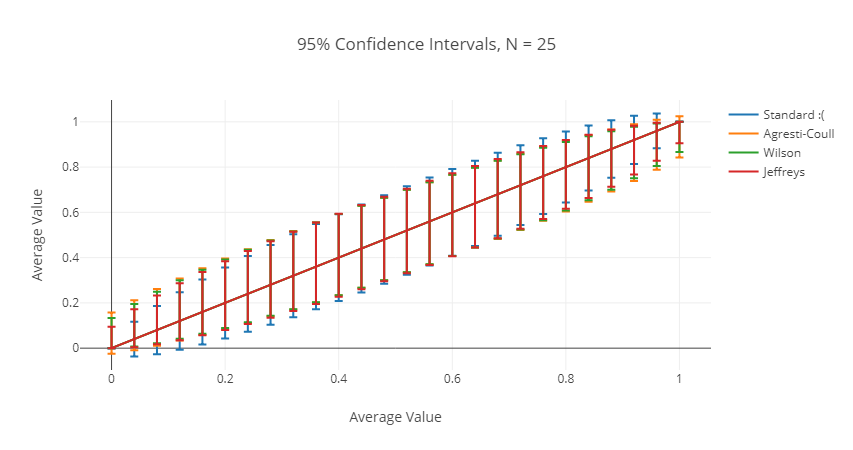

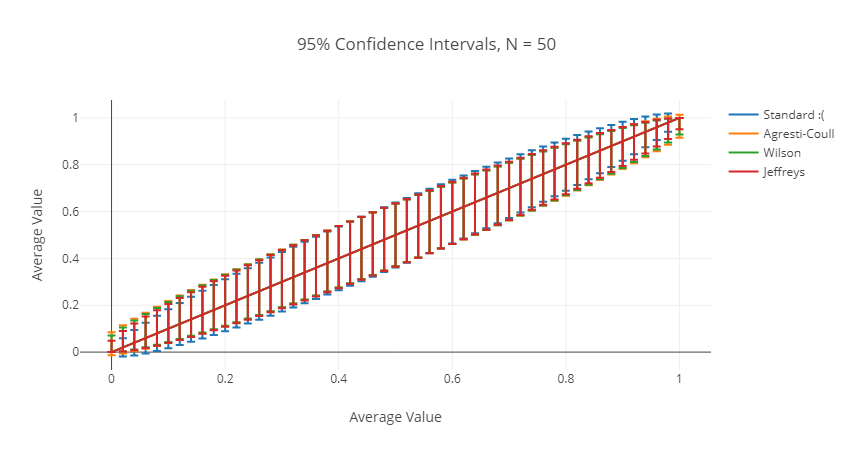

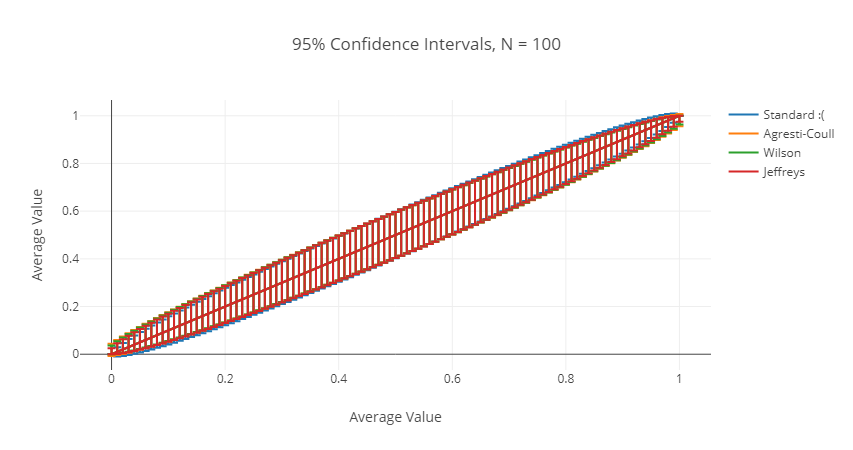

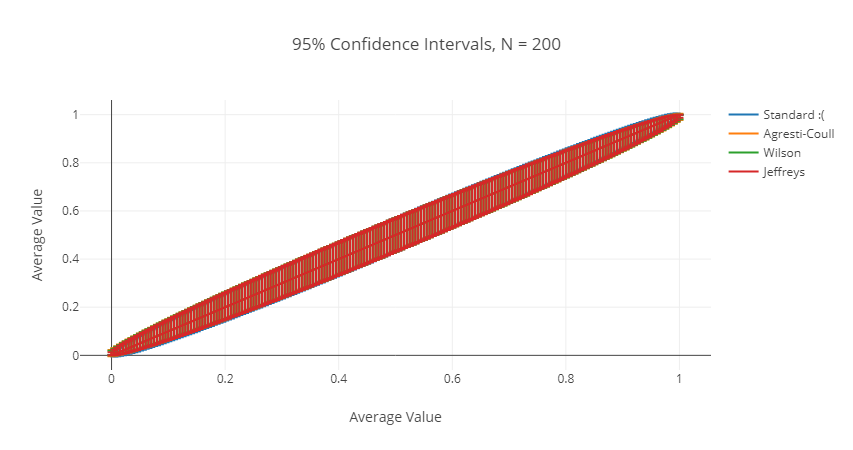

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [24]:
for npts in [10,25,50,100,200]:
    xpts = np.linspace(0,1,npts+1)
    figure(figsize=(20,10))
    # standard = [np.sqrt(x*(1-x))/np.sqrt(50) for x in xpts]
    standardBounds = getErrBars(xpts, npts, 'normal')
    acBounds = getErrBars(xpts, npts, 'agresti_coull')
    wilsonBounds = getErrBars(xpts, npts, 'wilson')
    jeffreysBounds = getErrBars(xpts, npts, 'jeffreys')
    args = {'linestyle':'','marker':'o','markersize':3, 'capsize':5}
    data = [go.Scatter( x=xpts, y=xpts,
                error_y={'type':'data','symmetric':False,'array':standardBounds[0],
                'arrayminus':standardBounds[1]}, name='Standard :(')]
    data.append(go.Scatter( x=xpts, y=xpts,
                error_y={'type':'data','symmetric':False,'array':acBounds[1],
                'arrayminus':acBounds[0]}, name='Agresti-Coull'))
    data.append(go.Scatter( x=xpts, y=xpts,
                error_y={'type':'data','symmetric':False,'array':wilsonBounds[1],
                'arrayminus':wilsonBounds[0]}, name='Wilson'))
    data.append(go.Scatter( x=xpts, y=xpts,
                error_y={'type':'data','symmetric':False,'array':jeffreysBounds[1],
                'arrayminus':jeffreysBounds[0]}, name='Jeffreys'))
    layout = go.Layout(title='95% Confidence Intervals, N = ' + str(npts), xaxis={'title':'Average Value'},yaxis={'title':'Average Value'})
    fig = go.Figure(data=data, layout=layout)
    plt.iplot(fig);    

### 0/x

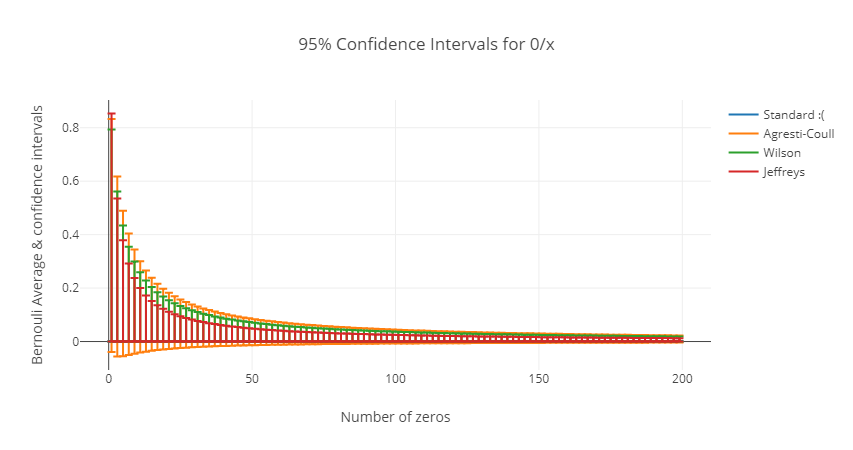

In [22]:
xpts = np.arange(1,200,2)
# standard = [np.sqrt(x*(1-x))/np.sqrt(50) for x in xpts]
standardBounds = getErrBars_(0, xpts, 'normal')
acBounds = getErrBars_(0, xpts, 'agresti_coull')
wilsonBounds = getErrBars_(0, xpts, 'wilson')
jeffreysBounds = getErrBars_(0, xpts, 'jeffreys')
zeros = np.zeros(len(xpts))
data = [go.Scatter( x=xpts, y=zeros,
            error_y={'type':'data','symmetric':False,'array':standardBounds[0],
            'arrayminus':standardBounds[1]}, name='Standard :(')]
data.append(go.Scatter( x=xpts, y=zeros,
            error_y={'type':'data','symmetric':False,'array':acBounds[1],
            'arrayminus':acBounds[0]}, name='Agresti-Coull'))
data.append(go.Scatter( x=xpts, y=zeros,
            error_y={'type':'data','symmetric':False,'array':wilsonBounds[1],
            'arrayminus':wilsonBounds[0]}, name='Wilson'))
data.append(go.Scatter( x=xpts, y=zeros,
            error_y={'type':'data','symmetric':False,'array':jeffreysBounds[1],
            'arrayminus':jeffreysBounds[0]}, name='Jeffreys'))
layout = go.Layout(title='95% Confidence Intervals for 0/x', xaxis={'title':'Number of zeros'},yaxis={'title':'Bernouli Average & confidence intervals'})
fig = go.Figure(data=data, layout=layout)
plt.iplot(fig);

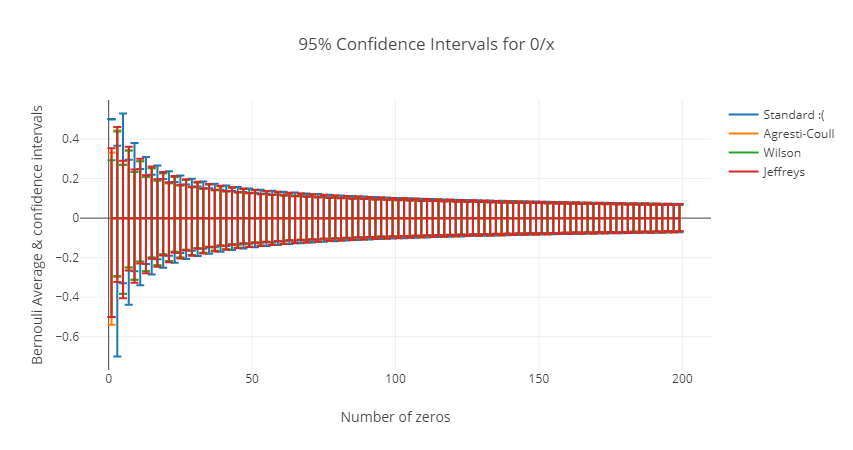

In [41]:
xpts = np.arange(1,200,2)
# standard = [np.sqrt(x*(1-x))/np.sqrt(50) for x in xpts]
standardBounds = getErrBars_(0.5, xpts, 'normal')
acBounds = getErrBars_(0.5, xpts, 'agresti_coull')
wilsonBounds = getErrBars_(0.5, xpts, 'wilson')
jeffreysBounds = getErrBars_(0.5, xpts, 'jeffreys')
zeros = np.zeros(len(xpts))
data = [go.Scatter( x=xpts, y=zeros,
            error_y={'type':'data','symmetric':False,'array':standardBounds[0],
            'arrayminus':standardBounds[1]}, name='Standard :(')]
data.append(go.Scatter( x=xpts, y=zeros,
            error_y={'type':'data','symmetric':False,'array':acBounds[1],
            'arrayminus':acBounds[0]}, name='Agresti-Coull'))
data.append(go.Scatter( x=xpts, y=zeros,
            error_y={'type':'data','symmetric':False,'array':wilsonBounds[1],
            'arrayminus':wilsonBounds[0]}, name='Wilson'))
data.append(go.Scatter( x=xpts, y=zeros,
            error_y={'type':'data','symmetric':False,'array':jeffreysBounds[1],
            'arrayminus':jeffreysBounds[0]}, name='Jeffreys'))
layout = go.Layout(title='95% Confidence Intervals for 0/x', xaxis={'title':'Number of zeros'},yaxis={'title':'Bernouli Average & confidence intervals'})
fig = go.Figure(data=data, layout=layout)
plt.iplot(fig);